# Route 3 West End - Inbound 6-9AM
- Bottlenecks 
    - constant 
        - sum below average
        - ignore bus stop sections
        - 1st quartile of each route for constant
        - top 3 slowest and 25% quartile
    - irregular
    - delayed data 
- Time categories 
    - *6-9am AM peak
    - 9am-2:30pm off peak
    - 2:30-6pm PM peak
    - 6pm-6am overnight 
- Day of interest
    - Sat/Sun
    - Holidays
    - *M/F
    - *T-Th
- Date Range
    - *5/25 - 7/26
    - *1/25 - 5/24

In [1]:
import geopandas as gpd 
import requests 
import pandas as pd
import matplotlib.pyplot as plt 
import json
from shapely.geometry import LineString


%matplotlib inline

In [2]:
with open('../data/WeGo.json')as start:
         credentials = json.load(start)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

In [11]:
params_geo = {
    'direction':'1',
    'startDate':'04-01-2022',
    #'endDate': '04-30-2022',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [12]:
response_geo = requests.get(URL, params = params_geo, headers=headers)

In [ ]:
#response_geo.json()

<AxesSubplot:>

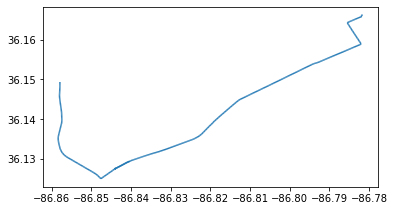

In [13]:
response_line_segments = response_geo.json()['features']
route3_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_gdf.plot()

In [ ]:
route3_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_gdf

In [ ]:
route3_gdf.sort_values('averageTravelSeconds', ascending = False)

In [ ]:
route3_gdf.describe()

## 1/25-5/24 M/onday-Friday 06:00-09:00 AM PEAK

In [91]:
params_geo = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_125mf_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_125mf_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,14.915652,2.518,1.907,1.760,1.697,1.573,1.440,1.302,1.098
1,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,11.938292,9.049,2.804,2.420,2.119,1.870,1.660,1.298,1.005
2,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,12.983307,5.271,2.301,2.034,1.861,1.726,1.564,1.381,1.228
3,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,9.474834,11.988,3.511,3.022,2.777,2.240,1.993,1.744,1.531
4,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,7.743666,18.146,6.418,4.318,3.074,2.125,1.794,1.515,1.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,"LINESTRING (-86.79247 36.15442, -86.79222 36.1...",WES17AEN,West End Ave & 17th Ave S Eb,BRO12AEF,Broadway Ave & 12th Ave Eb,24.692,1.994077,12.382671,4.157,2.430,2.237,2.126,1.923,1.781,1.552,1.266
468,"LINESTRING (-86.84759 36.12496, -86.84738 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,5.305432,4.684444,33.755,6.688,6.102,5.637,4.569,4.054,3.278,2.833
469,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.123626,11.486015,3.478,2.809,2.519,2.272,2.034,1.842,1.578,1.270
470,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.018139,8.167616,6.773,5.032,4.370,3.611,2.596,2.076,1.670,1.282


<AxesSubplot:>

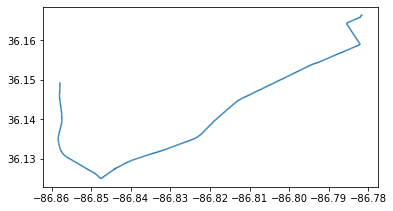

In [133]:
route3_125m_gdf.plot()

In [93]:
params = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response = requests.get(URL, params = params, headers=headers)
response_line_segments = response.json()['data']['segments']
route3_125mf_df = pd.DataFrame.from_dict(response_line_segments)
route3_125mf_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.132369849396795, 'lon': -86.831180...",2.518,1.907,1.760,1.697,1.573,1.440,1.362,1.302,1.098,23.816,1.596712,14.915652,"{'configRev': 49, 'stopPathId': 'WESWILEF_to_W...","{'configRev': 49, 'stopPathId': 'HARVINEN_to_W...",170
1,"[{'lat': 36.12699014863426, 'lon': -86.8446869...",9.049,2.804,2.420,2.119,1.870,1.660,1.490,1.298,1.005,24.495,2.051801,11.938292,"{'configRev': 49, 'stopPathId': 'HARKENEN_to_H...","{'configRev': 49, 'stopPathId': 'WHIPOSSN_to_H...",171
2,"[{'lat': 36.13942801266997, 'lon': -86.8574660...",5.271,2.301,2.034,1.861,1.726,1.564,1.481,1.381,1.228,23.616,1.818951,12.983307,"{'configRev': 49, 'stopPathId': 'WHIKENSN_to_W...","{'configRev': 49, 'stopPathId': 'WHICORSF_to_W...",142
3,"[{'lat': 36.143738031716985, 'lon': -86.814067...",11.988,3.511,3.022,2.777,2.240,1.993,1.905,1.744,1.531,24.297,2.564372,9.474834,"{'configRev': 49, 'stopPathId': 'WES31AEM_to_W...","{'configRev': 49, 'stopPathId': 'WESACKEN_to_W...",172
4,"[{'lat': 36.15197094235195, 'lon': -86.7980067...",18.146,6.418,4.318,3.074,2.125,1.794,1.698,1.515,1.130,24.723,3.192674,7.743666,"{'configRev': 49, 'stopPathId': 'WES20AEN_to_W...","{'configRev': 49, 'stopPathId': 'WES21AEN_to_W...",184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,"[{'lat': 36.154424067736194, 'lon': -86.792468...",4.157,2.430,2.237,2.126,1.923,1.781,1.702,1.552,1.266,24.692,1.994077,12.382671,"{'configRev': 49, 'stopPathId': 'WES17AEN_to_B...","{'configRev': 49, 'stopPathId': 'WES20AEN_to_W...",182
468,"[{'lat': 36.12496240167744, 'lon': -86.8475877...",33.755,6.688,6.102,5.637,4.569,4.054,3.719,3.278,2.833,24.853,5.305432,4.684444,"{'configRev': 49, 'stopPathId': 'WHIPOSSN_to_H...","{'configRev': 49, 'stopPathId': 'WBBTSN_to_WHI...",169
469,"[{'lat': 36.135518749274304, 'lon': -86.823117...",3.478,2.809,2.519,2.272,2.034,1.842,1.737,1.578,1.270,24.392,2.123626,11.486015,"{'configRev': 49, 'stopPathId': 'WESELMEN_to_W...","{'configRev': 49, 'stopPathId': 'WESLEOEN_to_W...",171
470,"[{'lat': 36.1493, 'lon': -86.85794}, {'lat': 3...",6.773,5.032,4.370,3.611,2.596,2.076,1.946,1.670,1.282,24.651,3.018139,8.167616,"{'configRev': 49, 'stopPathId': 'WHICHASF_to_W...","{'configRev': 49, 'stopPathId': 'to_WHICHASF',...",79


In [94]:
route3_125mf_df = route3_125mf_df[['percent20Secs', 'countForSegment']]
route3_125mf_df

,percent20Secs,countForSegment
0,1.362,170
1,1.490,171
2,1.481,142
3,1.905,172
4,1.698,184
...,...,...
467,1.702,182
468,3.719,169
469,1.737,171
470,1.946,79


In [95]:
params_geo = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_225mf_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_225mf_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,3.249949,7.466271,20.360,6.140,3.504,2.854,2.3280,2.012,1.806,1.440
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.698782,14.019456,5.045,2.115,1.821,1.710,1.6260,1.455,1.278,0.564
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,2.123400,11.703400,7.599,2.859,2.296,2.110,1.8595,1.677,1.498,1.375
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.250463,10.884427,8.269,3.437,2.857,2.415,2.0360,1.757,1.352,1.012
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.597438,9.354218,5.812,3.699,3.146,2.972,2.4060,2.078,1.751,1.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.496135,9.771907,35.715,2.786,2.447,2.243,2.0475,1.878,1.627,1.215
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.602400,9.205349,13.134,6.815,3.239,1.969,1.6640,1.482,1.298,1.167
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.722350,13.876970,3.108,2.313,2.066,1.878,1.5720,1.468,1.332,1.165
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,7.202232,3.336882,46.448,15.191,10.987,6.288,3.9080,2.983,2.287,1.970


In [96]:
params = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response = requests.get(URL, params = params, headers=headers)
response_line_segments = response.json()['data']['segments']
route3_225mf_df = pd.DataFrame.from_dict(response_line_segments)
route3_225mf_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.14103841559591, 'lon': -86.8172203...",20.360,6.140,3.504,2.854,2.3280,2.012,1.930,1.806,1.440,24.265,3.249949,7.466271,"{'configRev': 53, 'stopPathId': 'WESACKEN_to_W...","{'configRev': 53, 'stopPathId': 'WES440EM_to_W...",39
1,None,5.045,2.115,1.821,1.710,1.6260,1.455,1.400,1.278,0.564,23.816,1.698782,14.019456,NaN,NaN,87
2,"[{'lat': 36.12786376664939, 'lon': -86.8432296...",7.599,2.859,2.296,2.110,1.8595,1.677,1.558,1.498,1.375,24.851,2.123400,11.703400,"{'configRev': 53, 'stopPathId': 'HARWOOEN_to_H...","{'configRev': 53, 'stopPathId': 'HARKENEN_to_H...",40
3,"[{'lat': 36.12699014863426, 'lon': -86.8446869...",8.269,3.437,2.857,2.415,2.0360,1.757,1.513,1.352,1.012,24.495,2.250463,10.884427,"{'configRev': 53, 'stopPathId': 'HARKENEN_to_H...","{'configRev': 53, 'stopPathId': 'WHIPOSSN_to_H...",123
4,"[{'lat': 36.14389767254227, 'lon': -86.8138767...",5.812,3.699,3.146,2.972,2.4060,2.078,1.917,1.751,1.347,24.297,2.597438,9.354218,"{'configRev': 53, 'stopPathId': 'WES31AEM_to_W...","{'configRev': 53, 'stopPathId': 'WESACKEN_to_W...",89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"[{'lat': 36.135518749274304, 'lon': -86.823117...",35.715,2.786,2.447,2.243,2.0475,1.878,1.773,1.627,1.215,24.392,2.496135,9.771907,"{'configRev': 53, 'stopPathId': 'WESELMEN_to_W...","{'configRev': 53, 'stopPathId': 'WESLEOEN_to_W...",126
557,"[{'lat': 36.132636508512725, 'lon': -86.830465...",13.134,6.815,3.239,1.969,1.6640,1.482,1.382,1.298,1.167,23.956,2.602400,9.205349,"{'configRev': 53, 'stopPathId': 'WESWILEN_to_W...","{'configRev': 53, 'stopPathId': 'HARVINEN_to_W...",40
558,"[{'lat': 36.13047451454082, 'lon': -86.8371404...",3.108,2.313,2.066,1.878,1.5720,1.468,1.424,1.332,1.165,23.901,1.722350,13.876970,"{'configRev': 53, 'stopPathId': 'HARVINEN_to_W...","{'configRev': 53, 'stopPathId': 'HARWOOEN_to_H...",40
559,"[{'lat': 36.16286, 'lon': -86.78462}, {'lat': ...",46.448,15.191,10.987,6.288,3.9080,2.983,2.608,2.287,1.970,24.033,7.202232,3.336882,"{'configRev': 53, 'stopPathId': '8AVUNINN_to_C...","{'configRev': 53, 'stopPathId': '8ABRONM_to_8A...",125


In [97]:
route3_225mf_df = route3_225m_df[['percent20Secs', 'countForSegment']]
route3_225mf_df

,percent20Secs,countForSegment
0,1.830,15
1,1.433,39
2,1.519,16
3,1.375,53
4,1.902,40
...,...,...
556,1.701,54
557,1.326,16
558,1.354,16
559,2.562,54


In [98]:
params_geo = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_327mf_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_327mf_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.640527,14.815361,3.434,1.946,1.856,1.754,1.5940,1.499,1.296,0.530
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.791865,8.691323,18.689,4.233,3.348,2.917,2.4310,2.121,1.800,1.401
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.428369,17.001909,1.801,1.654,1.563,1.495,1.4310,1.327,1.233,1.122
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.464059,10.086203,7.300,4.289,3.148,2.629,2.0870,1.809,1.494,1.123
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.770418,2.514938,85.301,33.954,5.874,3.852,2.8990,2.010,1.567,0.741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.675614,14.767124,23.502,1.665,1.489,1.423,1.3000,1.233,1.121,0.761
1048,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.950233,12.283660,21.228,2.290,1.827,1.735,1.6025,1.479,1.301,0.644
1049,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.693736,14.111408,3.975,2.185,1.893,1.753,1.5890,1.464,1.279,0.748
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.690469,8.899192,4.757,3.987,3.337,3.097,2.5690,2.156,1.798,1.018


In [99]:
params = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response = requests.get(URL, params = params, headers=headers)
response_line_segments = response.json()['data']['segments']
route3_327mf_df = pd.DataFrame.from_dict(response_line_segments)
route3_327mf_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.07396189205922, 'lon': -86.9238482...",3.434,1.946,1.856,1.754,1.5940,1.499,1.438,1.296,0.530,24.305,1.640527,14.815361,"{'configRev': 53, 'stopPathId': 'H70HICEN_to_H...","{'configRev': 53, 'stopPathId': 'H70COLEM_to_H...",112
1,"[{'lat': 36.14103841559591, 'lon': -86.8172203...",18.689,4.233,3.348,2.917,2.4310,2.121,1.946,1.800,1.401,24.265,2.791865,8.691323,"{'configRev': 53, 'stopPathId': 'WESACKEN_to_W...","{'configRev': 53, 'stopPathId': 'WES440EM_to_W...",274
2,"[{'lat': 36.073773825154284, 'lon': -86.931411...",1.801,1.654,1.563,1.495,1.4310,1.327,1.288,1.233,1.122,24.285,1.428369,17.001909,"{'configRev': 53, 'stopPathId': 'H70COLEM_to_H...","{'configRev': 53, 'stopPathId': 'COLBAUNF_to_H...",111
3,"[{'lat': 36.127818852088716, 'lon': -86.851750...",7.300,4.289,3.148,2.629,2.0870,1.809,1.641,1.494,1.123,24.853,2.464059,10.086203,"{'configRev': 53, 'stopPathId': 'WHIPOSSN_to_H...","{'configRev': 53, 'stopPathId': 'WBBTSN_to_WHI...",153
4,"[{'lat': 36.13446011439085, 'lon': -86.8255030...",85.301,33.954,5.874,3.852,2.8990,2.010,1.737,1.567,0.741,24.572,9.770418,2.514938,"{'configRev': 53, 'stopPathId': 'WESLEOEN_to_W...","{'configRev': 53, 'stopPathId': 'WESWILEN_to_W...",268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"[{'lat': 36.09626, 'lon': -86.87775}, {'lat': ...",23.502,1.665,1.489,1.423,1.3000,1.233,1.181,1.121,0.761,24.744,1.675614,14.767124,"{'configRev': 53, 'stopPathId': 'H70PEREN_to_H...","{'configRev': 53, 'stopPathId': 'H70BROE_to_H7...",114
1048,"[{'lat': 36.132636508512725, 'lon': -86.830465...",21.228,2.290,1.827,1.735,1.6025,1.479,1.391,1.301,0.644,23.956,1.950233,12.283660,"{'configRev': 53, 'stopPathId': 'WESWILEN_to_W...","{'configRev': 53, 'stopPathId': 'HARVINEN_to_W...",266
1049,"[{'lat': 36.13047451454082, 'lon': -86.8371404...",3.975,2.185,1.893,1.753,1.5890,1.464,1.400,1.279,0.748,23.901,1.693736,14.111408,"{'configRev': 53, 'stopPathId': 'HARVINEN_to_W...","{'configRev': 53, 'stopPathId': 'HARWOOEN_to_H...",269
1050,"[{'lat': 36.125127055531735, 'lon': -86.847337...",4.757,3.987,3.337,3.097,2.5690,2.156,1.925,1.798,1.018,23.943,2.690469,8.899192,"{'configRev': 53, 'stopPathId': 'HARWODEN_to_H...","{'configRev': 53, 'stopPathId': 'HARBELNM_to_H...",113


In [100]:
route3_327mf_df = route3_327mf_df[['percent20Secs', 'countForSegment']]
route3_327mf_df

,percent20Secs,countForSegment
0,1.438,112
1,1.946,274
2,1.288,111
3,1.641,153
4,1.737,268
...,...,...
1047,1.181,114
1048,1.391,266
1049,1.400,269
1050,1.925,113


In [101]:
params_geo = {
    'direction':'1',
    'startDate':'04-27-2022',
    'endDate': '05-24-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_427mf_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_427mf_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.763954,13.778704,19.382,2.111,1.891,1.794,1.6010,1.448,1.306,1.077
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.604880,9.315208,10.217,4.118,3.216,2.719,2.2360,1.987,1.716,1.494
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.411901,17.200214,2.660,1.583,1.513,1.468,1.3940,1.324,1.231,0.767
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.522061,9.854242,10.602,4.168,3.367,2.796,2.1030,1.825,1.410,0.798
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.082513,3.040144,81.765,25.195,4.731,3.453,2.5935,1.768,1.464,0.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.721895,13.912579,25.246,1.996,1.772,1.640,1.5220,1.404,1.276,0.997
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.685775,14.178049,6.216,2.259,1.905,1.747,1.5630,1.426,1.286,1.048
1049,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.582503,15.635989,17.110,1.563,1.410,1.338,1.2620,1.190,1.107,1.004
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.920857,8.439646,6.148,5.110,4.100,3.443,2.7010,2.186,1.378,0.804


In [102]:
params = {
    'direction':'1',
    'startDate':'04-27-2022',
    'endDate': '05-24-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response = requests.get(URL, params = params, headers=headers)
response_line_segments = response.json()['data']['segments']
route3_427mf_df = pd.DataFrame.from_dict(response_line_segments)
route3_427mf_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.07396189205922, 'lon': -86.9238482...",19.382,2.111,1.891,1.794,1.6010,1.448,1.381,1.306,1.077,24.305,1.763954,13.778704,"{'configRev': 55, 'stopPathId': 'H70HICEN_to_H...","{'configRev': 55, 'stopPathId': 'H70COLEM_to_H...",153
1,"[{'lat': 36.14103841559591, 'lon': -86.8172203...",10.217,4.118,3.216,2.719,2.2360,1.987,1.892,1.716,1.494,24.265,2.604880,9.315208,"{'configRev': 55, 'stopPathId': 'WESACKEN_to_W...","{'configRev': 55, 'stopPathId': 'WES440EM_to_W...",299
2,"[{'lat': 36.073773825154284, 'lon': -86.931411...",2.660,1.583,1.513,1.468,1.3940,1.324,1.278,1.231,0.767,24.285,1.411901,17.200214,"{'configRev': 55, 'stopPathId': 'H70COLEM_to_H...","{'configRev': 55, 'stopPathId': 'COLBAUNF_to_H...",152
3,"[{'lat': 36.127818852088716, 'lon': -86.851750...",10.602,4.168,3.367,2.796,2.1030,1.825,1.682,1.410,0.798,24.853,2.522061,9.854242,"{'configRev': 55, 'stopPathId': 'WHIPOSSN_to_H...","{'configRev': 55, 'stopPathId': 'WBBTSN_to_WHI...",147
4,"[{'lat': 36.13446011439085, 'lon': -86.8255030...",81.765,25.195,4.731,3.453,2.5935,1.768,1.624,1.464,0.471,24.572,8.082513,3.040144,"{'configRev': 55, 'stopPathId': 'WESLEOEN_to_W...","{'configRev': 55, 'stopPathId': 'WESWILEN_to_W...",300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"[{'lat': 36.132637908964725, 'lon': -86.830462...",25.246,1.996,1.772,1.640,1.5220,1.404,1.349,1.276,0.997,23.956,1.721895,13.912579,"{'configRev': 55, 'stopPathId': 'WESWILEN_to_W...","{'configRev': 55, 'stopPathId': 'HARVINEN_to_W...",295
1048,"[{'lat': 36.13047262723422, 'lon': -86.8371404...",6.216,2.259,1.905,1.747,1.5630,1.426,1.366,1.286,1.048,23.901,1.685775,14.178049,"{'configRev': 55, 'stopPathId': 'HARVINEN_to_W...","{'configRev': 55, 'stopPathId': 'HARWOOEN_to_H...",298
1049,"[{'lat': 36.09626, 'lon': -86.87775}, {'lat': ...",17.110,1.563,1.410,1.338,1.2620,1.190,1.149,1.107,1.004,24.744,1.582503,15.635989,"{'configRev': 55, 'stopPathId': 'H70PEREN_to_H...","{'configRev': 55, 'stopPathId': 'H70BROE_to_H7...",153
1050,"[{'lat': 36.1493, 'lon': -86.85794}, {'lat': 3...",6.148,5.110,4.100,3.443,2.7010,2.186,1.729,1.378,0.804,24.651,2.920857,8.439646,"{'configRev': 55, 'stopPathId': 'WHICHASF_to_W...","{'configRev': 55, 'stopPathId': 'to_WHICHASF',...",84


In [103]:
route3_427mf_df = route3_427mf_df[['percent20Secs', 'countForSegment']]
route3_427mf_df

,percent20Secs,countForSegment
0,1.381,153
1,1.892,299
2,1.278,152
3,1.682,147
4,1.624,300
...,...,...
1047,1.349,295
1048,1.366,298
1049,1.149,153
1050,1.729,84


In [118]:
route3_125mf_concat = pd.concat([route3_125mf_gdf, route3_125mf_df], axis=1)
route3_125mf_concat.insert(loc=0, column='date', value = '05-26-2022', allow_duplicates=True)
route3_125mf_concat.insert(loc=1, column='time', value = '06:00-09:00', allow_duplicates=True)
route3_125mf_concat.insert(loc=2, column='day', value = 'M-F', allow_duplicates=True)
route3_125mf_concat

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,...,2.518,1.907,1.760,1.697,1.573,1.440,1.302,1.098,1.362,170
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,...,9.049,2.804,2.420,2.119,1.870,1.660,1.298,1.005,1.490,171
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,...,5.271,2.301,2.034,1.861,1.726,1.564,1.381,1.228,1.481,142
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,...,11.988,3.511,3.022,2.777,2.240,1.993,1.744,1.531,1.905,172
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,...,18.146,6.418,4.318,3.074,2.125,1.794,1.515,1.130,1.698,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.79247 36.15442, -86.79222 36.1...",WES17AEN,West End Ave & 17th Ave S Eb,BRO12AEF,Broadway Ave & 12th Ave Eb,24.692,1.994077,...,4.157,2.430,2.237,2.126,1.923,1.781,1.552,1.266,1.702,182
468,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84759 36.12496, -86.84738 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,5.305432,...,33.755,6.688,6.102,5.637,4.569,4.054,3.278,2.833,3.719,169
469,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.123626,...,3.478,2.809,2.519,2.272,2.034,1.842,1.578,1.270,1.737,171
470,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.018139,...,6.773,5.032,4.370,3.611,2.596,2.076,1.670,1.282,1.946,79


In [119]:
route3_225mf_concat = pd.concat([route3_225mf_gdf, route3_225mf_df], axis=1)
route3_225mf_concat.insert(loc=0, column='date', value = '05-26-2022', allow_duplicates=True)
route3_225mf_concat.insert(loc=1, column='time', value = '06:00-09:00', allow_duplicates=True)
route3_225mf_concat.insert(loc=2, column='day', value = 'M-F', allow_duplicates=True)
route3_225mf_concat

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,3.249949,...,20.360,6.140,3.504,2.854,2.3280,2.012,1.806,1.440,1.830,15
1,05-26-2022,06:00-09:00,M-F,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.698782,...,5.045,2.115,1.821,1.710,1.6260,1.455,1.278,0.564,1.433,39
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,2.123400,...,7.599,2.859,2.296,2.110,1.8595,1.677,1.498,1.375,1.519,16
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.250463,...,8.269,3.437,2.857,2.415,2.0360,1.757,1.352,1.012,1.375,53
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.597438,...,5.812,3.699,3.146,2.972,2.4060,2.078,1.751,1.347,1.902,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.496135,...,35.715,2.786,2.447,2.243,2.0475,1.878,1.627,1.215,1.701,54
557,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.602400,...,13.134,6.815,3.239,1.969,1.6640,1.482,1.298,1.167,1.326,16
558,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.722350,...,3.108,2.313,2.066,1.878,1.5720,1.468,1.332,1.165,1.354,16
559,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,7.202232,...,46.448,15.191,10.987,6.288,3.9080,2.983,2.287,1.970,2.562,54


In [120]:
route3_327mf_concat = pd.concat([route3_327mf_gdf, route3_327mf_df], axis=1)
route3_327mf_concat.insert(loc=0, column='date', value = '05-26-2022', allow_duplicates=True)
route3_327mf_concat.insert(loc=1, column='time', value = '06:00-09:00', allow_duplicates=True)
route3_327mf_concat.insert(loc=2, column='day', value = 'M-F', allow_duplicates=True)
route3_327mf_concat

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.640527,...,3.434,1.946,1.856,1.754,1.5940,1.499,1.296,0.530,1.438,112
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.791865,...,18.689,4.233,3.348,2.917,2.4310,2.121,1.800,1.401,1.946,274
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.428369,...,1.801,1.654,1.563,1.495,1.4310,1.327,1.233,1.122,1.288,111
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.464059,...,7.300,4.289,3.148,2.629,2.0870,1.809,1.494,1.123,1.641,153
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.770418,...,85.301,33.954,5.874,3.852,2.8990,2.010,1.567,0.741,1.737,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.675614,...,23.502,1.665,1.489,1.423,1.3000,1.233,1.121,0.761,1.181,114
1048,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.950233,...,21.228,2.290,1.827,1.735,1.6025,1.479,1.301,0.644,1.391,266
1049,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.693736,...,3.975,2.185,1.893,1.753,1.5890,1.464,1.279,0.748,1.400,269
1050,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.690469,...,4.757,3.987,3.337,3.097,2.5690,2.156,1.798,1.018,1.925,113


In [121]:
route3_427mf_concat = pd.concat([route3_427mf_gdf, route3_427mf_df], axis=1)
route3_427mf_concat.insert(loc=0, column='date', value = '05-26-2022', allow_duplicates=True)
route3_427mf_concat.insert(loc=1, column='time', value = '06:00-09:00', allow_duplicates=True)
route3_427mf_concat.insert(loc=2, column='day', value = 'M-F', allow_duplicates=True)
route3_427mf_concat

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.763954,...,19.382,2.111,1.891,1.794,1.6010,1.448,1.306,1.077,1.381,153
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.604880,...,10.217,4.118,3.216,2.719,2.2360,1.987,1.716,1.494,1.892,299
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.411901,...,2.660,1.583,1.513,1.468,1.3940,1.324,1.231,0.767,1.278,152
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.522061,...,10.602,4.168,3.367,2.796,2.1030,1.825,1.410,0.798,1.682,147
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.082513,...,81.765,25.195,4.731,3.453,2.5935,1.768,1.464,0.471,1.624,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.721895,...,25.246,1.996,1.772,1.640,1.5220,1.404,1.276,0.997,1.349,295
1048,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.685775,...,6.216,2.259,1.905,1.747,1.5630,1.426,1.286,1.048,1.366,298
1049,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.582503,...,17.110,1.563,1.410,1.338,1.2620,1.190,1.107,1.004,1.149,153
1050,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.920857,...,6.148,5.110,4.100,3.443,2.7010,2.186,1.378,0.804,1.729,84


In [123]:
r3_125mf_merged = pd.merge(route3_125mf_concat, route3_225mf_concat, how = 'outer')
r3_125mf_merged

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,...,2.518,1.907,1.760,1.697,1.5730,1.440,1.302,1.098,1.362,170
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,...,9.049,2.804,2.420,2.119,1.8700,1.660,1.298,1.005,1.490,171
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,...,5.271,2.301,2.034,1.861,1.7260,1.564,1.381,1.228,1.481,142
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,...,11.988,3.511,3.022,2.777,2.2400,1.993,1.744,1.531,1.905,172
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,...,18.146,6.418,4.318,3.074,2.1250,1.794,1.515,1.130,1.698,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.496135,...,35.715,2.786,2.447,2.243,2.0475,1.878,1.627,1.215,1.701,54
1029,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.602400,...,13.134,6.815,3.239,1.969,1.6640,1.482,1.298,1.167,1.326,16
1030,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.722350,...,3.108,2.313,2.066,1.878,1.5720,1.468,1.332,1.165,1.354,16
1031,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,7.202232,...,46.448,15.191,10.987,6.288,3.9080,2.983,2.287,1.970,2.562,54


In [125]:
r3_327mf_merged = pd.merge(r3_125mf_merged, route3_327mf_concat, how = 'outer')
r3_327mf_merged

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,...,2.518,1.907,1.760,1.697,1.5730,1.440,1.302,1.098,1.362,170
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,...,9.049,2.804,2.420,2.119,1.8700,1.660,1.298,1.005,1.490,171
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,...,5.271,2.301,2.034,1.861,1.7260,1.564,1.381,1.228,1.481,142
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,...,11.988,3.511,3.022,2.777,2.2400,1.993,1.744,1.531,1.905,172
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,...,18.146,6.418,4.318,3.074,2.1250,1.794,1.515,1.130,1.698,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.675614,...,23.502,1.665,1.489,1.423,1.3000,1.233,1.121,0.761,1.181,114
2081,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.950233,...,21.228,2.290,1.827,1.735,1.6025,1.479,1.301,0.644,1.391,266
2082,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.693736,...,3.975,2.185,1.893,1.753,1.5890,1.464,1.279,0.748,1.400,269
2083,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.690469,...,4.757,3.987,3.337,3.097,2.5690,2.156,1.798,1.018,1.925,113


In [126]:
r3_125mf_merged_final = pd.merge(r3_327mf_merged, route3_427mf_concat, how = 'outer')
r3_125mf_merged_final 

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,...,2.518,1.907,1.760,1.697,1.573,1.440,1.302,1.098,1.362,170
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,...,9.049,2.804,2.420,2.119,1.870,1.660,1.298,1.005,1.490,171
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,...,5.271,2.301,2.034,1.861,1.726,1.564,1.381,1.228,1.481,142
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,...,11.988,3.511,3.022,2.777,2.240,1.993,1.744,1.531,1.905,172
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,...,18.146,6.418,4.318,3.074,2.125,1.794,1.515,1.130,1.698,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.721895,...,25.246,1.996,1.772,1.640,1.522,1.404,1.276,0.997,1.349,295
3133,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.685775,...,6.216,2.259,1.905,1.747,1.563,1.426,1.286,1.048,1.366,298
3134,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.582503,...,17.110,1.563,1.410,1.338,1.262,1.190,1.107,1.004,1.149,153
3135,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.920857,...,6.148,5.110,4.100,3.443,2.701,2.186,1.378,0.804,1.729,84


In [130]:
r3_125mf_merged_final = r3_125mf_merged_final.loc[r3_125mf_merged_final['countForSegment']>10]
r3_125mf_merged_final

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.596712,...,2.518,1.907,1.760,1.697,1.573,1.440,1.302,1.098,1.362,170
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.051801,...,9.049,2.804,2.420,2.119,1.870,1.660,1.298,1.005,1.490,171
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.818951,...,5.271,2.301,2.034,1.861,1.726,1.564,1.381,1.228,1.481,142
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.564372,...,11.988,3.511,3.022,2.777,2.240,1.993,1.744,1.531,1.905,172
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.192674,...,18.146,6.418,4.318,3.074,2.125,1.794,1.515,1.130,1.698,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.721895,...,25.246,1.996,1.772,1.640,1.522,1.404,1.276,0.997,1.349,295
3133,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.685775,...,6.216,2.259,1.905,1.747,1.563,1.426,1.286,1.048,1.366,298
3134,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.582503,...,17.110,1.563,1.410,1.338,1.262,1.190,1.107,1.004,1.149,153
3135,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.920857,...,6.148,5.110,4.100,3.443,2.701,2.186,1.378,0.804,1.729,84


In [131]:
r3_125mf_merged_final.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000,3127.000000
mean,24.332832,3.476219,10.620429,26.527313,6.489387,4.290253,3.357968,2.425192,1.926591,1.573754,1.128230,1.746490,151.402303
std,0.545827,7.182504,4.650674,60.041186,18.271188,12.178879,9.650870,5.951443,2.625792,0.519322,0.378551,1.427961,79.874441
min,22.108000,1.143083,0.109025,1.549000,1.287000,1.223000,1.177000,1.119000,1.067000,0.851000,0.333000,1.012000,11.000000
25%,24.033000,1.746070,7.167509,4.169000,2.152500,1.907000,1.767500,1.601250,1.472000,1.314000,0.854000,1.402000,109.000000
50%,24.470000,2.249425,10.815869,8.285000,3.081000,2.493000,2.227000,1.896000,1.693000,1.469000,1.138000,1.597000,149.000000
75%,24.723000,3.390320,13.777415,30.561500,5.479000,3.888500,3.130000,2.416500,2.000000,1.707000,1.292500,1.866000,174.000000
max,24.998000,217.171063,21.407019,2126.105000,576.969000,341.932000,289.245000,219.971000,126.559000,13.007000,5.288000,72.492000,304.000000


## 5/26-7/26 Monday-Friday 06:00-09:00 AM PEAK

In [104]:
params_geo = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_526mf_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_526mf_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.601784,15.173706,2.809,1.945,1.798,1.710,1.5580,1.437,1.322,1.125
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.621083,9.257624,30.426,3.815,3.093,2.651,2.2660,1.976,1.682,0.962
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.395699,17.399883,1.875,1.584,1.523,1.464,1.3870,1.304,1.212,1.083
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.380140,10.441823,7.827,4.193,3.083,2.605,1.9840,1.688,1.380,0.978
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.607729,2.854644,76.700,36.398,5.111,3.713,2.3910,1.786,1.428,0.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.687951,14.192355,5.787,2.190,1.883,1.732,1.5760,1.430,1.273,1.020
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.653609,14.453840,8.603,2.040,1.812,1.702,1.5570,1.435,1.285,0.829
1050,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.425602,17.356878,13.784,1.609,1.441,1.362,1.2600,1.184,1.079,0.823
1051,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.966126,8.310840,22.776,5.556,4.101,3.467,2.3900,1.726,0.792,0.388


In [105]:
params = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response = requests.get(URL, params = params, headers=headers)
response_line_segments = response.json()['data']['segments']
route3_526mf_df = pd.DataFrame.from_dict(response_line_segments)
route3_526mf_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.07396189205922, 'lon': -86.9238482...",2.809,1.945,1.798,1.710,1.5580,1.437,1.387,1.322,1.125,24.305,1.601784,15.173706,"{'configRev': 56, 'stopPathId': 'H70HICEN_to_H...","{'configRev': 56, 'stopPathId': 'H70COLEM_to_H...",167
1,"[{'lat': 36.14103841559591, 'lon': -86.8172203...",30.426,3.815,3.093,2.651,2.2660,1.976,1.828,1.682,0.962,24.265,2.621083,9.257624,"{'configRev': 56, 'stopPathId': 'WESACKEN_to_W...","{'configRev': 56, 'stopPathId': 'WES440EM_to_W...",337
2,"[{'lat': 36.073773825154284, 'lon': -86.931411...",1.875,1.584,1.523,1.464,1.3870,1.304,1.270,1.212,1.083,24.285,1.395699,17.399883,"{'configRev': 56, 'stopPathId': 'H70COLEM_to_H...","{'configRev': 56, 'stopPathId': 'COLBAUNF_to_H...",166
3,"[{'lat': 36.127818852088716, 'lon': -86.851750...",7.827,4.193,3.083,2.605,1.9840,1.688,1.553,1.380,0.978,24.853,2.380140,10.441823,"{'configRev': 56, 'stopPathId': 'WHIPOSSN_to_H...","{'configRev': 56, 'stopPathId': 'WBBTSN_to_WHI...",171
4,"[{'lat': 36.13446011439085, 'lon': -86.8255030...",76.700,36.398,5.111,3.713,2.3910,1.786,1.629,1.428,0.755,24.572,8.607729,2.854644,"{'configRev': 56, 'stopPathId': 'WESLEOEN_to_W...","{'configRev': 56, 'stopPathId': 'WESWILEN_to_W...",329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"[{'lat': 36.132637908964725, 'lon': -86.830462...",5.787,2.190,1.883,1.732,1.5760,1.430,1.349,1.273,1.020,23.956,1.687951,14.192355,"{'configRev': 56, 'stopPathId': 'WESWILEN_to_W...","{'configRev': 56, 'stopPathId': 'HARVINEN_to_W...",329
1049,"[{'lat': 36.13047262723422, 'lon': -86.8371404...",8.603,2.040,1.812,1.702,1.5570,1.435,1.358,1.285,0.829,23.901,1.653609,14.453840,"{'configRev': 56, 'stopPathId': 'HARVINEN_to_W...","{'configRev': 56, 'stopPathId': 'HARWOOEN_to_H...",335
1050,"[{'lat': 36.09626, 'lon': -86.87775}, {'lat': ...",13.784,1.609,1.441,1.362,1.2600,1.184,1.137,1.079,0.823,24.744,1.425602,17.356878,"{'configRev': 56, 'stopPathId': 'H70PEREN_to_H...","{'configRev': 56, 'stopPathId': 'H70BROE_to_H7...",171
1051,"[{'lat': 36.1493, 'lon': -86.85794}, {'lat': 3...",22.776,5.556,4.101,3.467,2.3900,1.726,1.411,0.792,0.388,24.651,2.966126,8.310840,"{'configRev': 56, 'stopPathId': 'WHICHASF_to_W...","{'configRev': 56, 'stopPathId': 'to_WHICHASF',...",95


In [106]:
route3_526mf_df = route3_526mf_df[['percent20Secs', 'countForSegment']] 
route3_526mf_df

,percent20Secs,countForSegment
0,1.387,167
1,1.828,337
2,1.270,166
3,1.553,171
4,1.629,329
...,...,...
1048,1.349,329
1049,1.358,335
1050,1.137,171
1051,1.411,95


In [112]:
params_geo = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '05/30/2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_626mf_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_626mf_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.579181,15.390889,3.634,1.907,1.715,1.653,1.5575,1.429,1.294,0.777
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.579047,9.408514,17.390,3.979,3.172,2.701,2.2690,1.940,1.658,1.318
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.446386,16.790124,3.532,1.632,1.562,1.497,1.4195,1.337,1.228,1.144
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.162376,11.493376,5.366,3.779,2.707,2.165,1.7900,1.595,1.341,1.033
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.948899,3.536100,76.658,23.171,4.594,3.032,2.0790,1.673,1.452,0.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.845957,8.694439,140.224,1.564,1.419,1.336,1.2550,1.178,1.107,0.777
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.598453,14.986991,4.523,1.874,1.697,1.615,1.4985,1.388,1.267,0.965
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.598844,14.948926,3.695,2.066,1.778,1.641,1.4940,1.384,1.240,0.962
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.704179,8.854074,10.490,3.929,3.419,3.060,2.4955,1.968,1.637,1.259


In [108]:
params = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '05/30/2022',
    'beginTime': '06:00',
    'endTime': '09:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response = requests.get(URL, params = params, headers=headers)
response_line_segments = response.json()['data']['segments']
route3_626mf_df = pd.DataFrame.from_dict(response_line_segments)
route3_626mf_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.07396189205922, 'lon': -86.9238482...",3.634,1.907,1.715,1.653,1.5575,1.429,1.389,1.294,0.777,24.305,1.579181,15.390889,"{'configRev': 56, 'stopPathId': 'H70HICEN_to_H...","{'configRev': 56, 'stopPathId': 'H70COLEM_to_H...",160
1,"[{'lat': 36.14103841559591, 'lon': -86.8172203...",17.390,3.979,3.172,2.701,2.2690,1.940,1.785,1.658,1.318,24.265,2.579047,9.408514,"{'configRev': 56, 'stopPathId': 'WESACKEN_to_W...","{'configRev': 56, 'stopPathId': 'WES440EM_to_W...",317
2,"[{'lat': 36.073773825154284, 'lon': -86.931411...",3.532,1.632,1.562,1.497,1.4195,1.337,1.290,1.228,1.144,24.285,1.446386,16.790124,"{'configRev': 56, 'stopPathId': 'H70COLEM_to_H...","{'configRev': 56, 'stopPathId': 'COLBAUNF_to_H...",158
3,"[{'lat': 36.127818852088716, 'lon': -86.851750...",5.366,3.779,2.707,2.165,1.7900,1.595,1.443,1.341,1.033,24.853,2.162376,11.493376,"{'configRev': 56, 'stopPathId': 'WHIPOSSN_to_H...","{'configRev': 56, 'stopPathId': 'WBBTSN_to_WHI...",165
4,"[{'lat': 36.13446011439085, 'lon': -86.8255030...",76.658,23.171,4.594,3.032,2.0790,1.673,1.552,1.452,0.734,24.572,6.948899,3.536100,"{'configRev': 56, 'stopPathId': 'WESLEOEN_to_W...","{'configRev': 56, 'stopPathId': 'WESWILEN_to_W...",318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"[{'lat': 36.09626, 'lon': -86.87775}, {'lat': ...",140.224,1.564,1.419,1.336,1.2550,1.178,1.147,1.107,0.777,24.744,2.845957,8.694439,"{'configRev': 56, 'stopPathId': 'H70PEREN_to_H...","{'configRev': 56, 'stopPathId': 'H70BROE_to_H7...",162
1048,"[{'lat': 36.132637908964725, 'lon': -86.830462...",4.523,1.874,1.697,1.615,1.4985,1.388,1.335,1.267,0.965,23.956,1.598453,14.986991,"{'configRev': 56, 'stopPathId': 'WESWILEN_to_W...","{'configRev': 56, 'stopPathId': 'HARVINEN_to_W...",318
1049,"[{'lat': 36.13047262723422, 'lon': -86.8371404...",3.695,2.066,1.778,1.641,1.4940,1.384,1.329,1.240,0.962,23.901,1.598844,14.948926,"{'configRev': 56, 'stopPathId': 'HARVINEN_to_W...","{'configRev': 56, 'stopPathId': 'HARWOOEN_to_H...",321
1050,"[{'lat': 36.125127055531735, 'lon': -86.847337...",10.490,3.929,3.419,3.060,2.4955,1.968,1.816,1.637,1.259,23.943,2.704179,8.854074,"{'configRev': 56, 'stopPathId': 'HARWODEN_to_H...","{'configRev': 56, 'stopPathId': 'HARBELNM_to_H...",162


In [109]:
route3_626mf_df = route3_626m_df[['percent20Secs', 'countForSegment']] 
route3_626mf_df

,percent20Secs,countForSegment
0,1.384,66
1,1.709,131
2,1.299,65
3,1.442,69
4,1.547,133
...,...,...
1046,1.148,68
1047,1.329,134
1048,1.318,134
1049,1.698,68


In [115]:
route3_526mf_concat = pd.concat([route3_526mf_gdf, route3_526mf_df], axis=1)
route3_526mf_concat.insert(loc=0, column='date', value = '05-26-2022', allow_duplicates=True)
route3_526mf_concat.insert(loc=1, column='time', value = '06:00-09:00', allow_duplicates=True)
route3_526mf_concat.insert(loc=2, column='day', value = 'M-F', allow_duplicates=True)
route3_526mf_concat

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.601784,...,2.809,1.945,1.798,1.710,1.5580,1.437,1.322,1.125,1.387,167
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.621083,...,30.426,3.815,3.093,2.651,2.2660,1.976,1.682,0.962,1.828,337
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.395699,...,1.875,1.584,1.523,1.464,1.3870,1.304,1.212,1.083,1.270,166
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.380140,...,7.827,4.193,3.083,2.605,1.9840,1.688,1.380,0.978,1.553,171
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.607729,...,76.700,36.398,5.111,3.713,2.3910,1.786,1.428,0.755,1.629,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.687951,...,5.787,2.190,1.883,1.732,1.5760,1.430,1.273,1.020,1.349,329
1049,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.653609,...,8.603,2.040,1.812,1.702,1.5570,1.435,1.285,0.829,1.358,335
1050,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.425602,...,13.784,1.609,1.441,1.362,1.2600,1.184,1.079,0.823,1.137,171
1051,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.966126,...,22.776,5.556,4.101,3.467,2.3900,1.726,0.792,0.388,1.411,95


In [116]:
route3_626mf_concat = pd.concat([route3_626mf_gdf, route3_626mf_df], axis=1)
route3_626mf_concat.insert(loc=0, column='date', value = '05-26-2022', allow_duplicates=True)
route3_626mf_concat.insert(loc=1, column='time', value = '06:00-09:00', allow_duplicates=True)
route3_626mf_concat.insert(loc=2, column='day', value = 'M-F', allow_duplicates=True)
route3_626mf_concat

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.579181,...,3.634,1.907,1.715,1.653,1.5575,1.429,1.294,0.777,1.384,66.0
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.579047,...,17.390,3.979,3.172,2.701,2.2690,1.940,1.658,1.318,1.709,131.0
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.446386,...,3.532,1.632,1.562,1.497,1.4195,1.337,1.228,1.144,1.299,65.0
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.162376,...,5.366,3.779,2.707,2.165,1.7900,1.595,1.341,1.033,1.442,69.0
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.948899,...,76.658,23.171,4.594,3.032,2.0790,1.673,1.452,0.734,1.547,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.845957,...,140.224,1.564,1.419,1.336,1.2550,1.178,1.107,0.777,1.329,134.0
1048,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.598453,...,4.523,1.874,1.697,1.615,1.4985,1.388,1.267,0.965,1.318,134.0
1049,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.598844,...,3.695,2.066,1.778,1.641,1.4940,1.384,1.240,0.962,1.698,68.0
1050,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.704179,...,10.490,3.929,3.419,3.060,2.4955,1.968,1.637,1.259,1.585,50.0


In [117]:
r3_525mf_merged = pd.merge(route3_526mf_concat, route3_626mf_concat, how = 'outer')
r3_525mf_merged

,date,time,day,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,...,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.601784,...,2.809,1.945,1.798,1.710,1.5580,1.437,1.322,1.125,1.387,167.0
1,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.621083,...,30.426,3.815,3.093,2.651,2.2660,1.976,1.682,0.962,1.828,337.0
2,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.395699,...,1.875,1.584,1.523,1.464,1.3870,1.304,1.212,1.083,1.270,166.0
3,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.380140,...,7.827,4.193,3.083,2.605,1.9840,1.688,1.380,0.978,1.553,171.0
4,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.607729,...,76.700,36.398,5.111,3.713,2.3910,1.786,1.428,0.755,1.629,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.845957,...,140.224,1.564,1.419,1.336,1.2550,1.178,1.107,0.777,1.329,134.0
2101,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.598453,...,4.523,1.874,1.697,1.615,1.4985,1.388,1.267,0.965,1.318,134.0
2102,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.598844,...,3.695,2.066,1.778,1.641,1.4940,1.384,1.240,0.962,1.698,68.0
2103,05-26-2022,06:00-09:00,M-F,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.704179,...,10.490,3.929,3.419,3.060,2.4955,1.968,1.637,1.259,1.585,50.0
